**Gaussian unidimensional example**

In this code, we are going to show a general pipeline for a simple case of a Generative Model, using a unidimensional Gaussian distribution.

The first thing we need to do is to import the necessary libraries. We will use numpy to generate the samples and matplotlib to plot the results. We will also use the magic command `%matplotlib inline` to show the plots in the notebook.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, our input data will be unidimensional data from an unknown distribution (although we know it is a Gaussian because we are generating it). We plot the histogram of the data, and observe that a Gaussian distribution fits it well.

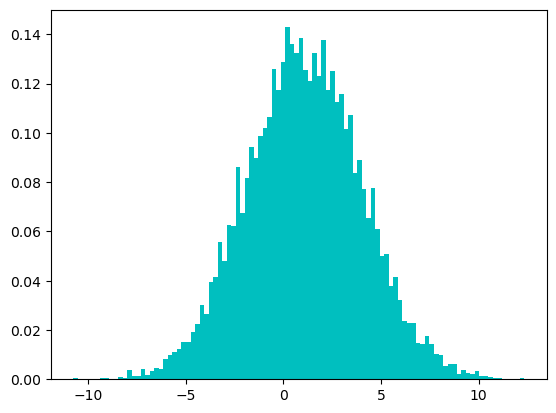

In [9]:
data = np.random.normal(loc=1, scale=3, size=10000)  # Generate the data (in a real life scenario, we would have only the data, and not the distribution and its parameters)
plt.hist(data, bins=100, density=True, color='c')
plt.show()  # Plot the histogram of the data, see how it resembles a Gaussian distribution well

Since we have assumed that we have a Gaussian distribution, we can estimate its parameters (mean and standard deviation) by using the formulas that we have seen in the slides, by applying MLE techniques, where we have:

 * $\hat{\mu}_{ML} = \frac{1}{N} \sum_{i=1}^N x_i$
 * $\hat{\sigma}_{ML}^2 = \frac{1}{N} \sum_{i=1}^N (x_i - \hat{\mu}_{ML})^2$

In [10]:
mu_ml = np.sum(data) / len(data)  # Compute the ML estimator of the mean of the data
sigma_2_ml = np.sum(np.square(data - mu_ml)) / len(data)  # Compute the ML estimator of the variance of the data
print('Estimated mean =', mu_ml)
print('Estimated variance =', sigma_2_ml)

Estimated mean = 1.064993784541431
Estimated variance = 8.69591344298773


Now, we are ready to generate samples from the Gaussian distribution that we have estimated, using a standard Gaussian as input. If $Z\sim \mathcal{N}(0, 1)$, then $X = \mu + \sigma Z \sim \mathcal{N}(\mu, \sigma^2)$. We can use this to generate samples from the Gaussian distribution that we have estimated.

In [11]:
z = np.random.normal(loc=0, scale=1, size=10000)  # Generate samples from a standard Gaussian
samples = mu_ml + np.sqrt(sigma_2_ml) * z  # Generate samples from the Gaussian distribution that we have estimated

Finally, we can plot the histogram of the samples that we have generated, and compare it with the histogram of the original data. We can see that they are very similar, as expected: our Generative Model has been able to generate samples that resemble the original data.

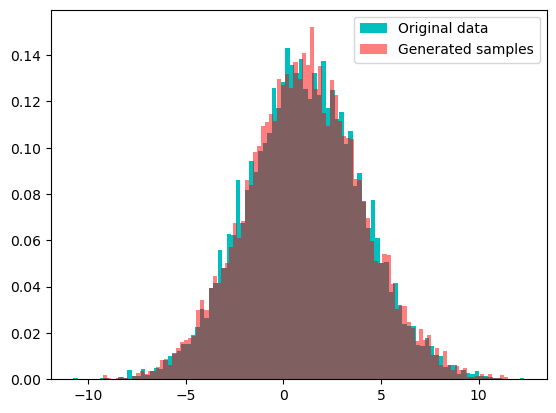

In [12]:
plt.hist(data, bins=100, density=True, color='c', label='Original data')  # Plot the histogram of the original data
plt.hist(samples, bins=100, density=True, color='r', alpha=0.5, label='Generated samples')  # Plot the histogram of the samples that we have generated
plt.legend(loc='best')
plt.show()